In [1]:
from kan import *
import torch

In [2]:
# Creating dataset
f = lambda x: torch.exp(torch.sin(torch.pi * x[:, [0]]) + x[:, [1]] ** 2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [3]:
torch.Size([1000, 2]), torch.Size([1000, 1]) 

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [4]:
model = KAN(width=[2, 5, 1], grid=5, seed=0)

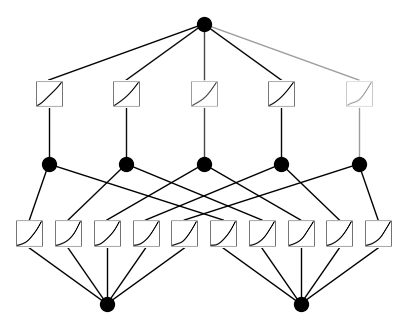

In [5]:
model(dataset['train_input'])
model.plot(beta=100)

In [6]:
model.train(dataset, opt='LBFGS', steps=20, lamb=0.01, lamb_entropy=10.)

train loss: 1.24e-01 | test loss: 1.28e-01 | reg: 2.75e+01 : 100%|██| 20/20 [00:13<00:00,  1.46it/s]


{'train_loss': [array(0.26819286, dtype=float32),
  array(0.17452955, dtype=float32),
  array(0.15325184, dtype=float32),
  array(0.13343671, dtype=float32),
  array(0.14243154, dtype=float32),
  array(0.12959374, dtype=float32),
  array(0.13006763, dtype=float32),
  array(0.13004245, dtype=float32),
  array(0.13003634, dtype=float32),
  array(0.13003562, dtype=float32),
  array(0.12785476, dtype=float32),
  array(0.13068046, dtype=float32),
  array(0.13013326, dtype=float32),
  array(0.13030645, dtype=float32),
  array(0.13180254, dtype=float32),
  array(0.12771283, dtype=float32),
  array(0.13256168, dtype=float32),
  array(0.1255922, dtype=float32),
  array(0.12474004, dtype=float32),
  array(0.12419502, dtype=float32)],
 'test_loss': [array(0.27685058, dtype=float32),
  array(0.17424653, dtype=float32),
  array(0.15571968, dtype=float32),
  array(0.13564293, dtype=float32),
  array(0.1447365, dtype=float32),
  array(0.13273554, dtype=float32),
  array(0.1333233, dtype=float32),
  a

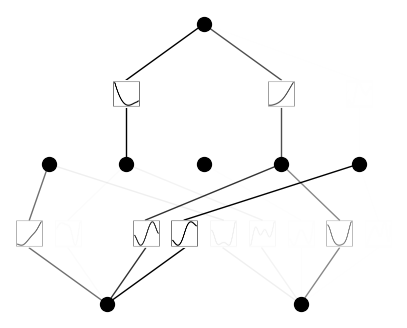

In [7]:
model.plot()

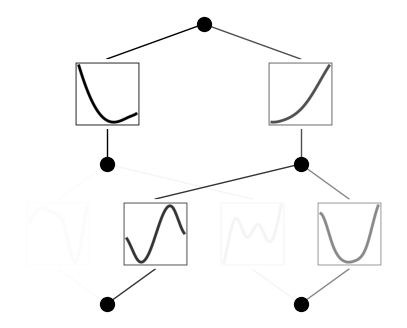

In [13]:
model.prune()
model.plot(mask=True)

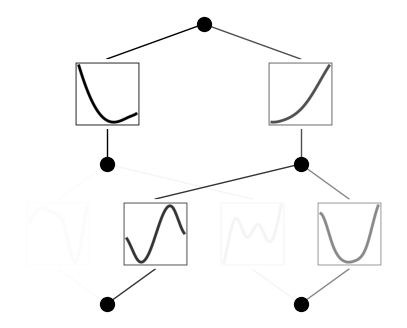

In [9]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [14]:
model.train(dataset, opt='LFBGS', steps=50)

train loss: 1.24e-01 | test loss: 1.31e-01 | reg: 2.75e+01 : 100%|██| 50/50 [00:00<00:00, 55.32it/s]


{'train_loss': [array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.12419502, dtype=float32),
  array(0.1241

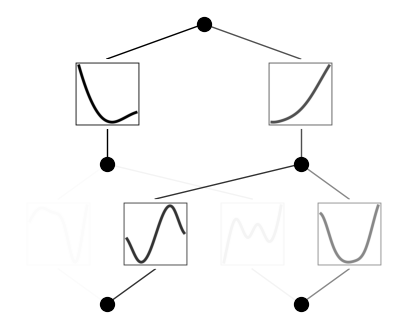

In [15]:
model.plot()

In [16]:
mode = "auto" # 'manual'

if mode == "manual":
    model.fix_symbolic(0, 0, 0, 'sin')
    model.fix_symbolic(0, 1, 0, 'x^2')
    model.fix_symbolic(1, 0, 0, 'exp')

elif mode == 'auto':
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.8013775944709778
fixing (0,0,1) with sin, r2=0.9978649616241455
fixing (0,1,0) with sin, r2=0.7662591934204102
fixing (0,1,1) with x^2, r2=0.9895468354225159
fixing (1,0,0) with x^2, r2=0.9719180464744568
fixing (1,1,0) with tanh, r2=0.9999717473983765


In [17]:
model.train(dataset, opt="LBFGS", steps=50)

train loss: 5.59e-03 | test loss: 5.61e-03 | reg: 2.19e+03 : 100%|██| 50/50 [00:21<00:00,  2.32it/s]


{'train_loss': [array(0.1113622, dtype=float32),
  array(0.10281537, dtype=float32),
  array(0.08756817, dtype=float32),
  array(0.04791792, dtype=float32),
  array(0.04221254, dtype=float32),
  array(0.04084367, dtype=float32),
  array(0.03829699, dtype=float32),
  array(0.03306655, dtype=float32),
  array(0.02712714, dtype=float32),
  array(0.02417585, dtype=float32),
  array(0.02235816, dtype=float32),
  array(0.02048316, dtype=float32),
  array(0.01910267, dtype=float32),
  array(0.01691612, dtype=float32),
  array(0.01500591, dtype=float32),
  array(0.01460707, dtype=float32),
  array(0.01445222, dtype=float32),
  array(0.01375664, dtype=float32),
  array(0.01285478, dtype=float32),
  array(0.01268631, dtype=float32),
  array(0.01252238, dtype=float32),
  array(0.01187278, dtype=float32),
  array(0.01169499, dtype=float32),
  array(0.01097375, dtype=float32),
  array(0.01043538, dtype=float32),
  array(0.00971362, dtype=float32),
  array(0.00967478, dtype=float32),
  array(0.00951

In [18]:
model.symbolic_formula()[0][0]

50.63*tanh(0.53*x_2**2 + 0.52*sin(3.15*x_1) - 2.33) + 50.67